# Project 2: Investigate a Dataset

### The dataset is (No-show appointments)

In [99]:
#import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Assessing and Wrangling

-	The file contains Information about medical appointments in Brazil and specifies whether the patients show up for their appointment or not. The dataset contains a total of 110527 rows and 14 columns or features. 
-	After I loaded and assessed the data in python, I noticed that there are no null or duplicate values to handle. 
-	I did a descriptive summary and noticed that the minimum age is (-1) so I thought it was an outlier or data entry mistake that why I drop it.
-	 I convert the AppointmentDay from object to date to be able to create a new column holding the weekdays for my analysis.
-	Also, I convert the type of 'Gender', and 'Neighborhood' to categorical 

In [100]:
#read the csv file and save it into the data frame
df = pd.read_csv('No_Show_Appointment.csv')

In [101]:
#Number of rows and columns
df.shape

(110527, 14)

In [102]:
#check Data Types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [103]:
#Check null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#check total duplicate values
df.duplicated().sum()

0

In [104]:
#view genral information about the data set attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [105]:
#use Descriptive Analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [106]:
#Drop the row when age is -1  
df.drop(df[df['Age']==-1].index, inplace= True)

In [107]:
#check the minimum age
df['Age'].min()

0

In [108]:
#Convert Appointment to date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [109]:
#check data types after converting
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay                   object
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [120]:
#create new column to identify the week days 
df['day_of_week'] = df['AppointmentDay'].dt.day_name()

In [121]:
#view the attributes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday


In [111]:
#Convert Neighbourhood, and Gender to Str
for i in ['Gender', 'Neighbourhood']:
    df[i] = df[i].astype('category')

In [112]:
#check data types after converting
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                       category
ScheduledDay                   object
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

## Data Exploring

In [123]:
#Create new data frame for the missed (No Show) appointments
Missed = df[df['No-show']=='Yes']

### What is the percentage of patients who missed their appointments?

I created piechart function to plot the pie chart and the parameters are data frame, column, and two labels. To answer the question I used No_show column to count the values of Yes and No then plot the result with the percentages. We have total 22319 missed appointments and their percent is 20% out of total.

In [114]:
#define the function
def piechart(df,x,L1,L2):
    #count the values of X
    count = df[x].value_counts()
    #plot the count using pie
    plt.pie(count,autopct='%1.1f%%',labels = [L1,L2]);

Text(0.5, 1.0, 'The Show Up and Missed Appointments')

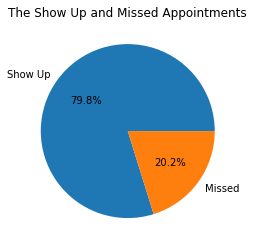

In [115]:
#define the labels
Label1 = "Show Up"
Label2 = "Missed"
#call the function
piechart(df,'No-show',Label1,Label2)
#title
plt.title('The Show Up and Missed Appointments')

### Where did the most missed appointments happen?

I wanted to check if some of the neighborhoods are facing more missed appointments than others. I used value count to count the missed appointments by neighborhood and found out that JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA, and CENTRO are the top least attendance.

In [116]:
#count how many missed appointments in each neighbourhood
Missed['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
PARQUE INDUSTRIAL                 0
Name: Neighbourhood, Length: 81, dtype: int64

### Does the day of the week affect attendance?

This idea came to my mind, there is a probability that patients missed their appointments more through workdays or weekends. I searched for Brazil workdays and weekends and create a new column for the days called day_of_week so I can use it for the histogram to count the number of missed appointments by day. After plotting the day of the week and the number of missed appointments, I don't see a strong relationship between the two of them, but most of the missed appointments occurred in the middle of the week.

Workdays in Brazil: Monday, Tuesday, Wednesday, Thursday, Friday

Weekends in Brazil: Sturday, Sunday

In [124]:
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#count the number of missed appointments by day
Missed['day_of_week'].value_counts().reindex(days_sorted)

Monday       4690
Tuesday      5152
Wednesday    5093
Thursday     3338
Friday       4037
Saturday        9
Name: day_of_week, dtype: int64

Text(0.5, 0, 'Weekdays')

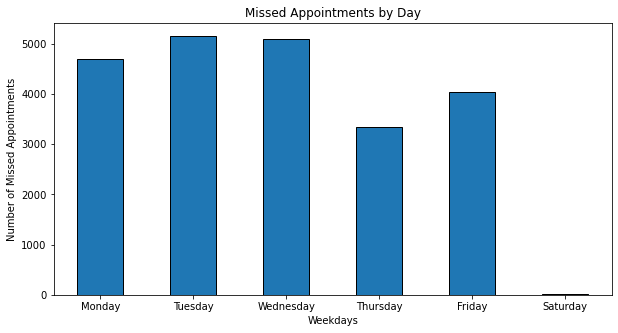

In [125]:
#plot the count of days ordered using reindex labeled and rotated
Missed['day_of_week'].value_counts().reindex(days_sorted).plot.bar(edgecolor='black', figsize=[10,5], rot=0)
#titles
plt.title('Missed Appointments by Day')
plt.ylabel('Number of Missed Appointments')
plt.xlabel('Weekdays')

### Who's missed the appointments the most, (males or females)?

I used the function that I defined above and use the gender column to plot the total number of male and female missed appointments. Females missed their appointments 65% more than males.

Text(0.5, 1.0, 'Missed Appointments By Gender')

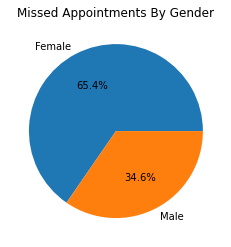

In [95]:
#define the labels
Label1 = "Female"
Label2 = "Male"
#call the function
piechart(Missed,'Gender',Label1,Label2)
#title
plt.title('Missed Appointments By Gender')

### Is there a range of ages who missed their appointments the most? 

I used two line chart to visualize the diffrence between the total appointments (for those who missed or showed up) grouped by age, and I noticed that younger patients most probably missed their appointments. Also after using the bar chart I noticed that the more patient become old it's become least chance to miss appointments.

Text(0, 0.5, 'No-show')

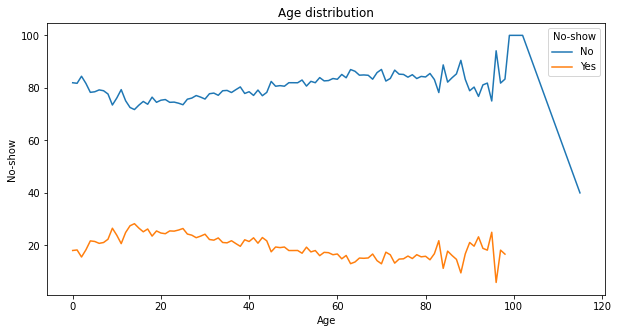

In [64]:
#group the age and count the no show values
df.groupby('Age')['No-show'].value_counts(normalize=True).mul(100).unstack().plot(figsize=[10,5]);
#titles
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('No-show')

Text(0, 0.5, 'Missed Appointments')

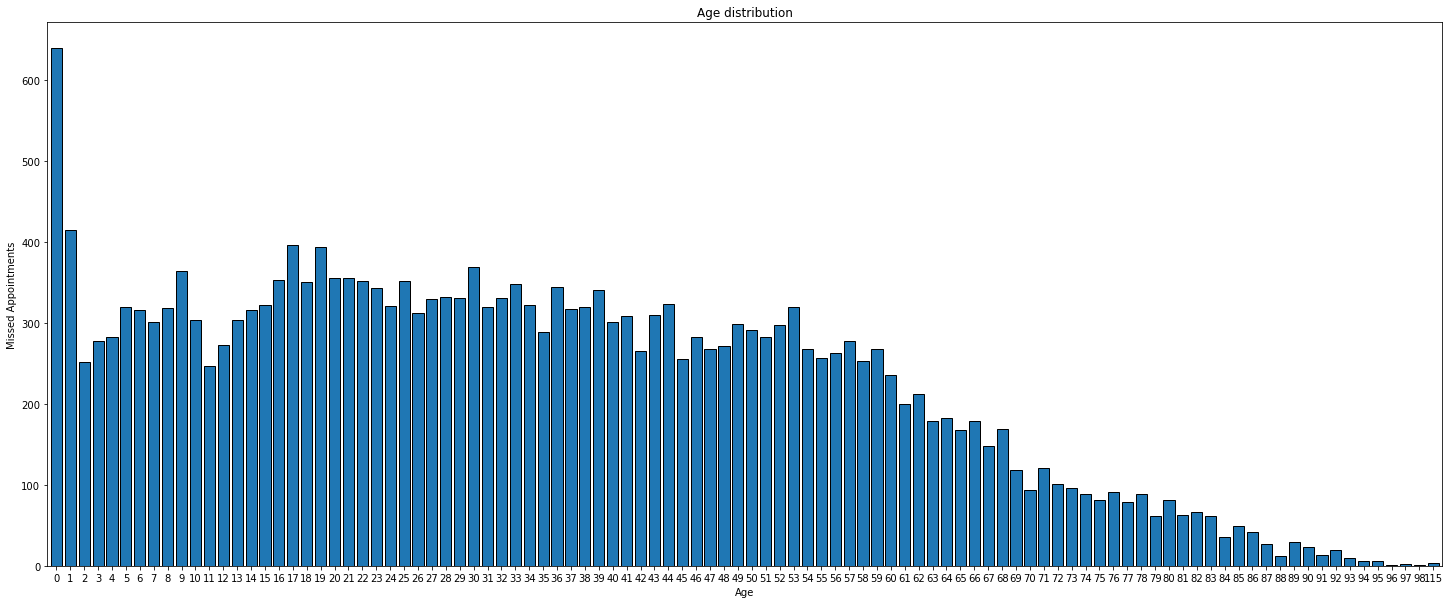

In [61]:
#also here I show the distribution on one varabile the age
Missed['Age'].value_counts().sort_index().plot.bar(edgecolor='black', figsize=[25,10],rot=0,width=0.8);
#titles
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Missed Appointments')

## Analysis Conclusion

- 20% of the patients missed their appointment and most of them were in the following neighborhoods JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA, CENTRO
- In general, the missed appointments occurred on both workdays and weekends the same. No appointments are scheduled on Sunday and the total number of appointments on Saturday is very small compared to the rest week
- Females are most likely to miss their appointments compared to the males
- I used scatter plot and noticed that younger patients are more likely to miss their appointments(Negative Correlation).
- Limitation: I think having more features/factors in the dataset will help for this type of analysis and reaching insights and clarify many things. Also, to have more records of the missed appointments to study patients' characteristics and behavior.